In [1]:
using Pkg
Pkg.activate("..") # activate BurgersJoint environment
Pkg.instantiate() # install all dependencies if necessary
using BurgersJoint
using BurgersJoint.BurgersEquation
using BurgersJoint.ChebyshevTau
using Plots

  Activating project at `~/Documents/ACFPD/Individual assignment/BurgersJoint`
Precompiling project...
    914.3 ms  ✓ BurgersJoint
  1 dependency successfully precompiled in 2 seconds. 223 already precompiled.


In [2]:
# Parameter choices:
N   = 64    # number of grid points is N + 1
dt   = 5e-4/pi   # time step
T = 3/pi    # final time
nu  = 1e-2/pi # viscosity

x, u_final, tvec, history = solveChebyshevTau(N; dt=dt, T=T, nu=nu)

println("Simulation complete!")
println("Final time = ", tvec[end])

Solving: 100%[==========================================] Time: 0:00:01


Simulation complete!
Final time = 0.9547705036082802


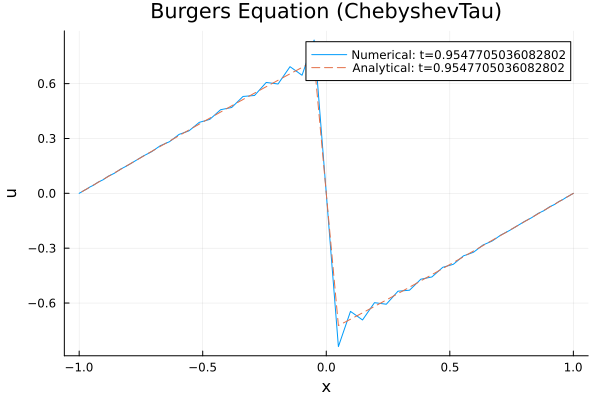

In [3]:
plt = plot(x, u_final, label="Numerical: t=$(tvec[end])", xlabel="x", ylabel="u", 
           title="Burgers Equation (ChebyshevTau)")
plot!(plt, x, analytical_solution(x, tvec[end]; nu=nu), label="Analytical: t=$(tvec[end])", 
      linestyle=:dash)
display(plt)

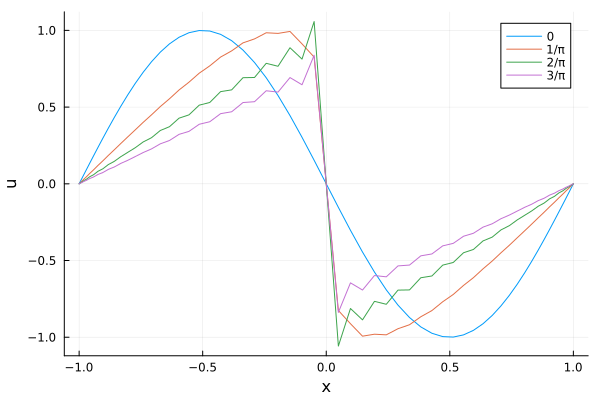

In [4]:
times_to_plot = 0:1/pi:T

plt = plot()
for (idx, t) in enumerate(times_to_plot)
    current_label = idx == 1 ? "0" : "$(idx-1)/π"
    plot!(plt, x, history[idx], label=current_label)
end
plot!(plt, xlabel="x", ylabel="u")
display(plt)

In [5]:
history

4-element Vector{Vector{Float64}}:
 [-1.2246467991473532e-16, -0.0037841769051338466, -0.015127050337670481, -0.033996444760672845, -0.06032816792442334, -0.09401056380632308, -0.134863720260579, -0.1826142262802423, -0.23686670360734563, -0.29707369984844917  …  0.29707369984844917, 0.23686670360734563, 0.18261422628024274, 0.134863720260579, 0.09401056380632308, 0.06032816792442334, 0.033996444760672845, 0.015127050337670925, 0.0037841769051338466, 1.2246467991473532e-16]
 [-1.3234276566871526e-16, -0.001881634918457165, -0.007594301943726453, -0.016852775166410986, -0.030288237565050693, -0.04668074604970488, -0.06778791483493314, -0.09111843812687852, -0.11956307281912013, -0.14971170130810432  …  0.1497117013081044, 0.11956307281912029, 0.09111843812687878, 0.06778791483493396, 0.04668074604970388, 0.030288237565051324, 0.016852775166412086, 0.007594301943726908, 0.0018816349184570457, 1.272152344243145e-16]
 [-1.2769644143897058e-17, -0.0012412208915966668, -0.0051815397844169695